In [1]:
# Importación de las librerías necesarias para el proyecto
# 1. OpenCV para procesamiento de imágenes y tareas de visión por computadora
import cv2

# 2. Numpy para operaciones de matrices y arreglos
import numpy as np

# 3. Matplotlib para visualización y trazado de gráficos y diagramas
import matplotlib.pyplot as plt

# 4. Copy para copiar arreglos y matrices
import copy

In [2]:
# Leyendo la imagen y convirtiendola a escala de grises (0-255)
img = cv2.imread('maze00.jpg', 0)

In [3]:
# Normalizando la imagen para mejorar la detección de bordes
def normalizar_imagen(img):
    img_norm = img

    for i, linea in enumerate(img_norm):
        for j, valor_pixel in enumerate(linea):
            # Si el valor del pixel es mayor a 200, se asigna 1, de lo contrario 0
            if valor_pixel > 200:
                img_norm[i][j] = 1
            else:
                img_norm[i][j] = 0

    return img_norm

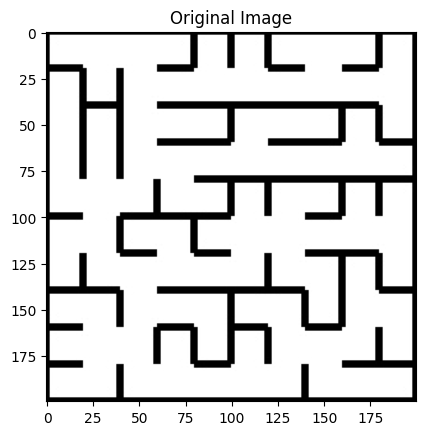

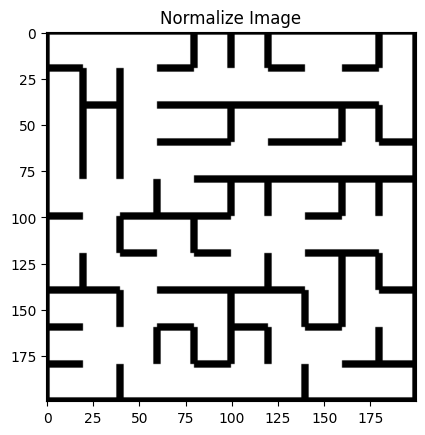

In [4]:
# Muestra la imagen con el título
def mostrar_imagen(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

# Imagen original
mostrar_imagen(img, 'Original Image')

# Normalizando la imagen para mejorar la detección de bordes
imagen_normalizada = normalizar_imagen(img)

# Imagen normalizada
mostrar_imagen(imagen_normalizada, 'Normalize Image')

In [5]:
# Obteniendo el tamaño de la imagen
img.shape

(200, 200)

In [6]:
# Variables globales
# Copia de la imagen normalizada
imagen = copy.deepcopy(imagen_normalizada)

# Define los puntos de inicio y final
start = (0,0)
end = (9,9)

# Especifica el tamaño de cada celda en la cuadrícula creada en la imagen
cell_size = 20

# Marca para los puntos de inicio y final
mark = 2
# Relleno para crear una cuadrícula en la imagen
# padding = 10

# Define los movimientos posibles en la imagen (arriba, abajo, izquierda, derecha)
movimientos = [(1,0),(-1,0),(0,1),(0,-1)]

# Calcula de tamaño total de la imagen en coordenadas (filas, columnas)
total_coordenadas = (imagen.shape[0]//cell_size,imagen.shape[1]//cell_size)

# Inicializamos una matriz de ceros para almacenar el camino trazado en la imagen (filas, columnas)
camino_trazado = np.zeros(total_coordenadas)

# Crea una matriz para almacenar el número asociado con cada celda en la imagen (filas, columnas)
numero_matriz = np.zeros(total_coordenadas)

# Inicializamos una matriz para almacenar el número de cada celda en la imagen (filas, columnas)
numero_id = np.zeros(total_coordenadas)

In [7]:
# Define una función para representar una celda en la imagen
def repm(img, coordinate, fill=None, path_print=False, pad=4):

    # Obtiene la posición actual en la imagen (fila, columna)
    actual_pos = tuple(map(lambda x:x*cell_size, coordinate))

    # si fill es None, se devuelve la imagen en la posición actual con el tamaño de la celda, sin rellenar
    if fill is None:
        return img[actual_pos[0]:actual_pos[0]+cell_size, actual_pos[1]:actual_pos[1]+cell_size]
    
    # si path_print es True, rellena la celda con el valor fill
    # este se usa para marcar el camino trazado por el algoritmo en la imagen final del laberinto resuelto
    if path_print:
        img[actual_pos[0]+pad:actual_pos[0]+cell_size-pad, actual_pos[1]+pad:actual_pos[1]+cell_size-pad] = fill
    else:
        # En la posición actual de las coordenadas, se asigna el valor fill.
        # Esto indica que en las ubicaciones específicas de la matriz traced_path, se asigna el valor fill.
        # Esto indica que esa área ha sido visitada por el algoritmo.
        # Este se usa para marcar todas las celdas visitadas por el algoritmo en la imagen final del laberinto resuelto
        camino_trazado[coordinate[0], coordinate[1]] = fill

In [8]:
# Define una función para encontrar las direcciones disponibles desde la celda actual
def find_direction(current):
    direction = []
    CELL_SIZE = cell_size

    # Abajo
    # Verificar el centro hacia abajo en busca de celdas con valor 0 (CELL_SIZE//2:,CELL_SIZE//2)
    if 0 not in current[CELL_SIZE//2:,CELL_SIZE//2]:
        direction.append(0)
        
     # Arriba
    # Verificar el centro hacia arriba en busca de celdas con valor 0 (:CELL_SIZE//2,CELL_SIZE//2)
    if 0 not in current[:CELL_SIZE//2, CELL_SIZE//2]:
        direction.append(1)
    
    # Derecha
    # Verificar el centro hacia la derecha en busca de celdas con valor 0 (CELL_SIZE//2,CELL_SIZE//2:)
    if 0 not in current[CELL_SIZE//2, CELL_SIZE//2:]:
        direction.append(2)
    # Izquierda
    # Verificar el centro hacia la izquierda en busca de celdas con valor 0 (CELL_SIZE//2:,:CELL_SIZE//2)
    if 0 not in current[CELL_SIZE//2, :CELL_SIZE//2]:
        direction.append(3)

    return direction

In [9]:
# Función de inundación para encontrar el camino desde el punto de inicio hasta el punto final en la imagen (función recursiva)
def flood(img, coordinate, mark, start):
    
    # Obtenemos la celda actual en la imagen
    current = repm(img, coordinate)

    # Si la celda actual contiene un 1, es una pared, por lo que no podemos pasar.
    # Si la celda ya ha sido marcada con un valor mayor a "mark", tampoco podemos pasar.
    if((1 in current)and((camino_trazado[coordinate[0],coordinate[1]]>mark)or(camino_trazado[coordinate[0],coordinate[1]]==0))):
        repm(img, coordinate, mark)
    else:
        return 1
    
    # Encontrar las direcciones disponibles desde la celda actual
    direction = find_direction(current)

    # if coordinate == (7,3):
    #     pass
    
     # Llamar recursivamente a la función flood para explorar las direcciones disponibles
    for i in direction:
        flood(img,(coordinate[0]+movimientos[i][0],coordinate[1]+movimientos[i][1]),mark+1,start)

In [10]:
# Haciendo una copia de la imagen original
nueva_imagen = copy.deepcopy(imagen_normalizada)

# Llamando a la función flood para encontrar el camino desde el punto de inicio hasta el punto final en la imagen
flood(nueva_imagen, end, mark, start)

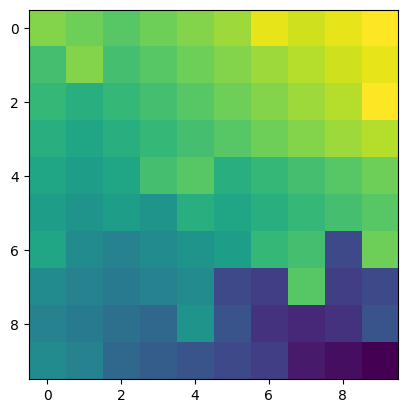

In [11]:
# Mostrar la imagen con todos los caminos trazados por el algoritmo
plt.imshow(camino_trazado)

In [12]:
# Función para trazar el camino desde el punto de inicio hasta el punto final en la imagen
def trace(img, coordinate, end, path):
    # Si la coordenada actual es igual a la coordenada final, se devuelve el camino
    if coordinate == end:
        return path

    dire = []
    dirc = []
    
    # Obtiene la celda actual en la imagen
    current = repm(img, coordinate)
    
    # Encuentra las direcciones disponibles desde la celda actual 
    direction = find_direction(current)

    # Encuentra las direcciones disponibles desde la celda actual
    for i in direction:
        try:
            # Si la celda actual ya ha sido visitada, 
            # no se considera para encontrar la dirección mínima disponible desde la celda actual
            element=camino_trazado[coordinate[0]+movimientos[i][0],coordinate[1]+movimientos[i][1]]
            if element==0:
                continue
            
            # Si la celda actual no ha sido visitada, 
            # se considera para encontrar la dirección mínima disponible desde la celda actual
            if ((coordinate[0]+movimientos[i][0]>=0)and(coordinate[1]+movimientos[i][1]>=0)):
                # Se almacena la dirección y el valor de la celda en la dirección en la lista dire y dirc
                dire.append(element)
                dirc.append(i)
        except:
            pass

    # Encuentra la dirección mínima
    mi = min(dire)
    
    # Encuentra el índice de la dirección mínima
    ind = dire.index(mi)

    # Agrega la coordenada actual a la lista de path (camino)
    path.append((coordinate[0]+movimientos[dirc[ind]][0],coordinate[1]+movimientos[dirc[ind]][1]))

    # Llamar recursivamente a la función trace para encontrar el camino desde el punto de inicio hasta el punto final en la imagen
    return trace(img,(coordinate[0]+movimientos[dirc[ind]][0],coordinate[1]+movimientos[dirc[ind]][1]),end,path)

In [13]:
# Inicializamos el camino con el punto de inicio
camino = [start]

# Haciendo una copia de la imagen original
nueva_imagen = copy.deepcopy(imagen_normalizada)

# Llamando a la función trace para trazar el camino desde el punto de inicio hasta el punto final en la imagen
camino = trace(nueva_imagen, start, end, camino)

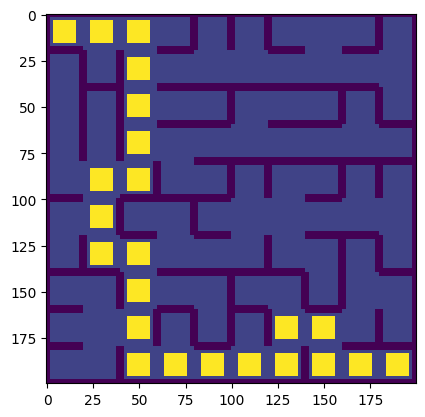

In [14]:
# Crear una copia de la imagen original
img_path_show = copy.deepcopy(imagen_normalizada)

# Marcar el camino trazado por el algoritmo en la imagen final del laberinto resuelto
for i,j in enumerate(camino):
    # Agrega un fill de 5 para marcar el camino trazado por el algoritmo en la imagen final del laberinto resuelto
    repm(img_path_show,j,5,True)
    
# Mostrar la imagen final del laberinto resuelto con el camino trazado por el algoritmo
plt.imshow(img_path_show, interpolation='none')